# Stats - duration and severity, annual

In [1]:
import importlib
import matplotlib.pyplot as plt
import climag.climag as cplt
import seaborn as sns
import geopandas as gpd
import os
import numpy as np

In [2]:
# mask for offshore areas
ie_bbox = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="ne_10m_land_2157_IE_BBOX_DIFF",
)
# mask for non-pasture areas
mask = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE",
)
# pasture areas for clipping prior to calculating stats
pastures = gpd.read_file(
    os.path.join("data", "landcover", "clc-2018-pasture.gpkg"),
    layer="dissolved",
)["geometry"]

In [3]:
def plot_heatmap(dataset, model=0, rlat=15, rlon=15):
    for v in list(dataset.data_vars):
        dataset_df = (
            dataset.isel(model=model, rlat=rlat, rlon=rlon)[v]
            .to_dataframe()[[v]]
            .dropna()
            .reset_index()
            .pivot(index="exp", columns="year", values=v)
        )
        plt.figure(figsize=(15, 5))
        sns.heatmap(dataset_df, xticklabels=True, cmap="RdPu")
        plt.title(v)
        plt.tight_layout()
        plt.show()

In [5]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [4]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [5]:
ds_ec_count, ds_ec_val = cplt.calc_event_duration(ds_ec, variable="bm", skipna=True)

### Count

In [9]:
cplt.describe_dataset(ds_ec_count, pastures)

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


,bm
count,237600.000000
mean,196.337837
std,32.587551
min,0.000000
25%,183.000000
50%,197.000000
75%,210.000000
max,366.000000


In [10]:
cplt.describe_dataset(ds_ec_count, pastures, exp=True)

exp         historical         rcp45         rcp85
bm count  79200.000000  79200.000000  79200.000000
   mean     190.303194    196.837929    201.872386
   std       29.129975     31.990436     35.307643
   min        0.000000      0.000000      0.000000
   25%      180.000000    184.000000    186.000000
   50%      193.000000    198.000000    201.000000
   75%      205.000000    210.000000    216.000000
   max      366.000000    366.000000    365.000000

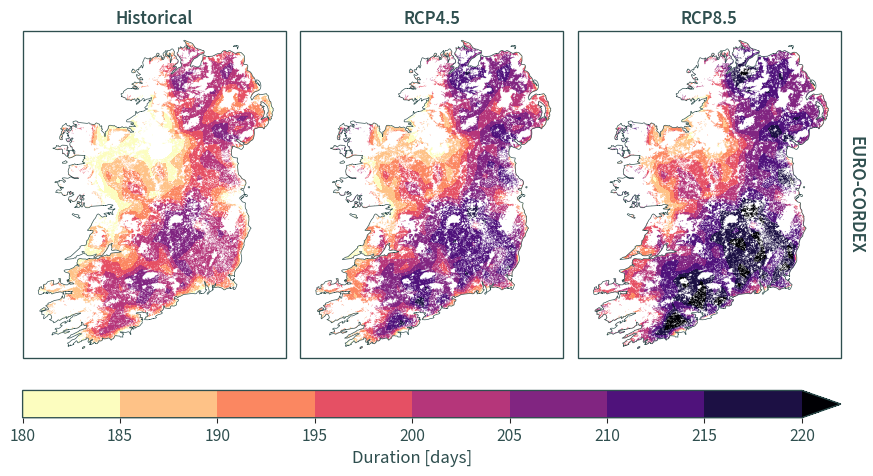

In [12]:
cplt.plot_stats(ds_ec_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="max", row="data",
    levels=np.arange(180, 220 + 5, 5)
)

### Magnitude

In [13]:
cplt.describe_dataset(ds_ec_val, pastures)

,bm
count,237600.000000
mean,463.690237
std,201.032366
min,0.000000
25%,331.325815
50%,453.442407
75%,579.461607
max,1504.611083


In [14]:
cplt.describe_dataset(ds_ec_val, pastures, exp=True)

exp         historical         rcp45         rcp85
bm count  79200.000000  79200.000000  79200.000000
   mean     440.796013    471.638384    478.636315
   std      203.066776    197.802823    200.175599
   min        0.000000      0.000000      0.000000
   25%      305.741331    345.100415    348.822518
   50%      422.037095    465.331898    472.133718
   75%      552.744249    583.875588    597.085017
   max     1484.301793   1418.482069   1504.611083

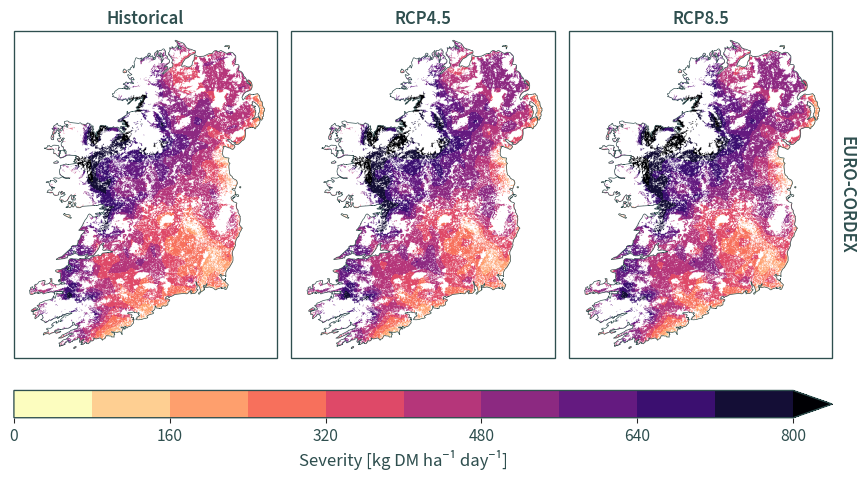

In [22]:
cplt.plot_stats(ds_ec_val.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="EURO-CORDEX").expand_dims(dim="data")["bm"], cplt.projection_eurocordex, mask, ie_bbox, label="Severity [kg DM ha⁻¹ day⁻¹]", cmap="magma_r", extend="max", row="data",
    levels=np.arange(0, 800 + 80, 80)
)

## HiResIreland

In [16]:
ds_hr = cplt.load_all_data("HiResIreland")

In [17]:
ds_hr_count, ds_hr_val = cplt.calc_event_duration(ds_hr, variable="bm", skipna=True)

### Count

In [18]:
cplt.describe_dataset(ds_hr_count, pastures)

,bm
count,1.960920e+06
mean,1.968404e+02
std,4.221041e+01
min,0.000000e+00
25%,1.790000e+02
50%,1.980000e+02
75%,2.160000e+02
max,3.660000e+02


In [19]:
cplt.describe_dataset(ds_hr_count, pastures, exp=True)

exp          historical          rcp45          rcp85
bm count  653640.000000  653640.000000  653640.000000
   mean      187.024019     199.195510     204.301689
   std        38.659241      42.309909      43.622454
   min         0.000000       0.000000       0.000000
   25%       173.000000     182.000000     186.000000
   50%       190.000000     200.000000     206.000000
   75%       205.000000     217.000000     226.000000
   max       366.000000     366.000000     366.000000

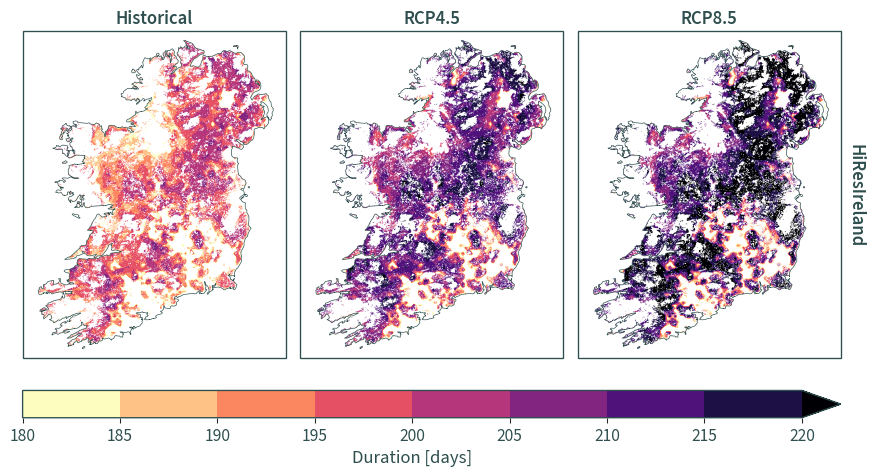

In [23]:
cplt.plot_stats(ds_hr_count.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="HiResIreland").expand_dims(dim="data")["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Duration [days]", cmap="magma_r", extend="max", row="data",
    levels=np.arange(180, 220 + 5, 5)
)

### Magnitude

In [20]:
cplt.describe_dataset(ds_hr_val, pastures)

,bm
count,1.960920e+06
mean,2.562927e+02
std,1.358200e+02
min,0.000000e+00
25%,1.522893e+02
50%,2.371289e+02
75%,3.388713e+02
max,1.283534e+03


In [21]:
cplt.describe_dataset(ds_hr_val, pastures, exp=True)

exp          historical          rcp45          rcp85
bm count  653640.000000  653640.000000  653640.000000
   mean      227.106319     265.553795     276.218031
   std       124.850063     136.249640     140.908347
   min         0.000000       0.000000       0.000000
   25%       131.570865     161.535509     168.963495
   50%       207.076969     248.088653     258.579123
   75%       299.754536     349.732558     364.214844
   max      1033.771463    1224.974605    1283.533819

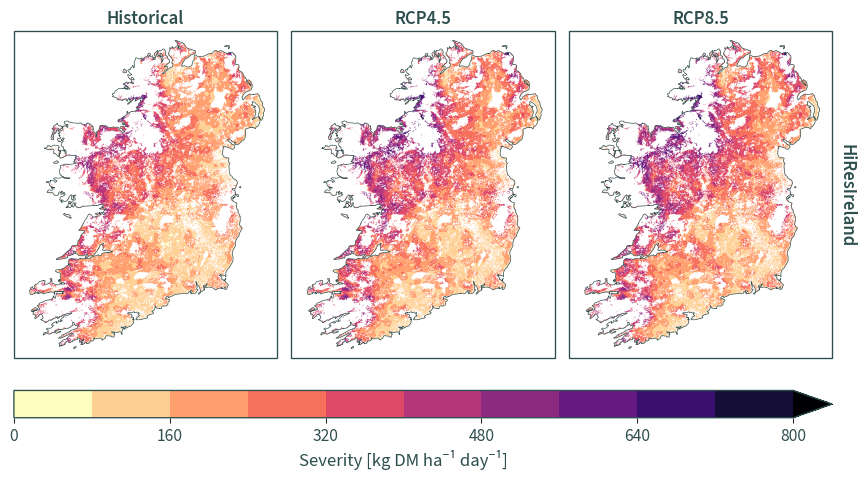

In [26]:
cplt.plot_stats(ds_hr_val.mean(dim="year", skipna=True).mean(dim="model", skipna=True).assign_coords(data="HiResIreland").expand_dims(dim="data")["bm"], cplt.projection_hiresireland, mask, ie_bbox, label="Severity [kg DM ha⁻¹ day⁻¹]", cmap="magma_r", extend="max", row="data",
    levels=np.arange(0, 800 + 80, 80)
)